In [3]:
import pandas as pd
import random
import seaborn as sns
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Définir le nombre de lignes à lire
nrows = 100000

# Lire le fichier entier
df = pd.read_csv("raw_data/valeursfoncieres-2023.txt", sep="|", dtype=str)

# Sélectionner 100,000 lignes au hasard
chunk = df.sample(n=nrows, random_state=1)

# Liste des colonnes d'intérêt
cols = ['Date mutation', 'Nature mutation', 'Valeur fonciere',
        'Type de voie', 'Code postal', 'Surface Carrez du 1er lot',
        'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot',
        'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot',
        'Nombre de lots', 'Code type local', 'Surface reelle bati',
        'Nombre pieces principales', 'Surface terrain']

departements = ['75', '13', '69', '31', '06', '44', '34', '67', '33', '59']

# Sélectionner les colonnes
chunk = chunk[cols]
chunk = chunk[chunk['Code postal'].astype(str).str.startswith(tuple(departements))]

In [5]:
chunk['Valeur fonciere'] = chunk['Valeur fonciere'].str.replace(',', '.').astype(float)

VALEUR FONCIERE (Y)

In [6]:
#Inspection préliminaire
valeur_fonciere_counts = chunk['Valeur fonciere'].value_counts().reset_index()
valeur_fonciere_counts.columns = ['Valeur fonciere', 'Fréquence']
valeur_fonciere_counts = valeur_fonciere_counts.sort_values('Valeur fonciere')
valeur_fonciere_counts

"Grande disparité des données, valeurs extremes à exclure"

'Grande disparité des données, valeurs extremes à exclure'

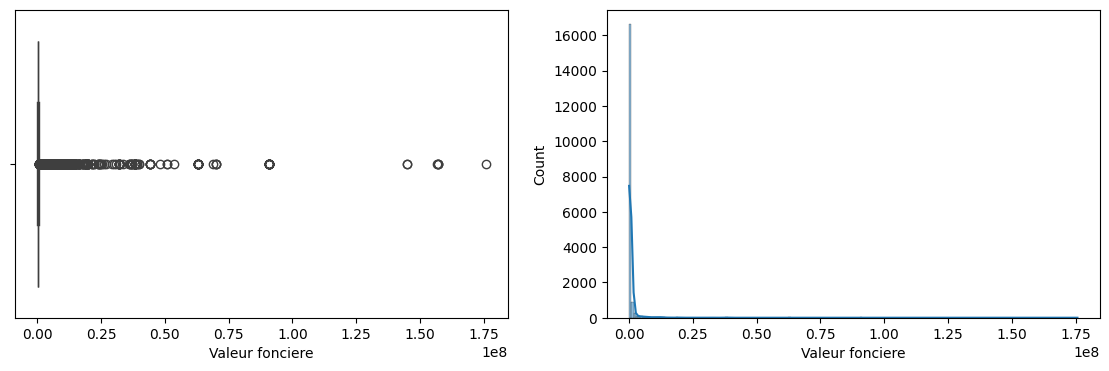

In [7]:
#Visualisation graphique 
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.boxplot(data=chunk, x='Valeur fonciere')
plt.subplot(1,2,2)
sns.histplot(chunk['Valeur fonciere'], bins=200,kde = True);

DATE MUTATION

In [8]:
#Inspection préliminaire
date_mutation_counts = chunk['Date mutation'].value_counts().reset_index()
date_mutation_counts.columns = ['Date mutation', 'Fréquence']

date_mutation_counts['Date mutation'] = pd.to_datetime(date_mutation_counts['Date mutation'], format='%d/%m/%Y')
date_mutation_counts = date_mutation_counts.sort_values('Date mutation')
date_mutation_counts

,Date mutation,Fréquence
249,2023-01-02,9
242,2023-01-03,37
234,2023-01-04,46
141,2023-01-05,68
137,2023-01-06,69
...,...,...
247,2023-12-26,26
37,2023-12-27,93
4,2023-12-28,141
7,2023-12-29,137


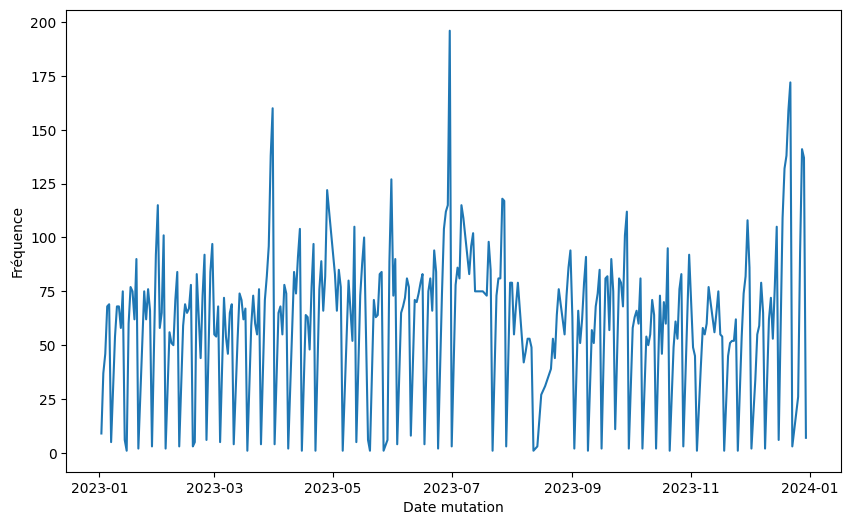

In [9]:
#Visualisation graphique
plt.figure(figsize=(10, 6))
plt.plot(date_mutation_counts['Date mutation'], date_mutation_counts['Fréquence'])
plt.xlabel('Date mutation')
plt.ylabel('Fréquence')
plt.show()

NATURE MUTATION

In [10]:
#Inspection préliminaire
nature_mutation_counts = chunk['Nature mutation'].value_counts().reset_index()
nature_mutation_counts.columns = ['Nature mutation', 'Fréquence']
nature_mutation_counts = nature_mutation_counts.sort_values('Nature mutation')
nature_mutation_counts

,Nature mutation,Fréquence
4,Adjudication,31
2,Echange,157
5,Expropriation,4
0,Vente,17337
1,Vente en l'état futur d'achèvement,1079
3,Vente terrain à bâtir,41


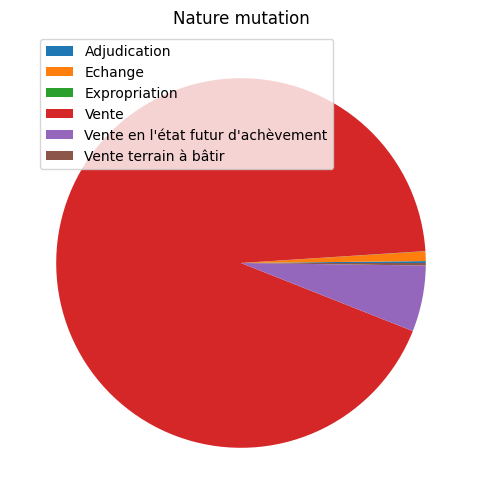

In [11]:
#Visualisation graphique
plt.figure(figsize=(6, 6))
plt.pie(nature_mutation_counts['Fréquence'], labels=None)
plt.title('Nature mutation')
plt.legend(labels=nature_mutation_counts['Nature mutation'], bbox_to_anchor=(0.05, 1), loc='upper left')
plt.show()

TYPE DE VOIE

In [12]:
#Inspection préliminaire
type_voie_counts = chunk['Type de voie'].value_counts().reset_index()
type_voie_counts.columns = ['Type de voie', 'Fréquence']
type_voie_counts = type_voie_counts.sort_values('Fréquence', ascending=False)
type_voie_counts

,Type de voie,Fréquence
0,RUE,7974
1,AV,1932
2,CHE,826
3,BD,772
4,RTE,610
...,...,...
59,RPE,1
58,ZONE,1
57,CAE,1
56,RUET,1


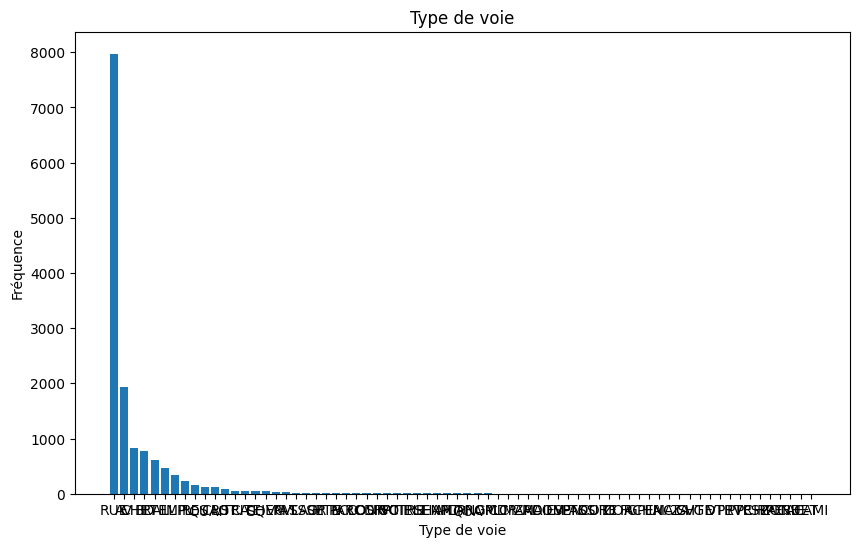

In [13]:
#Visualisation graphique
plt.figure(figsize=(10, 6))
plt.bar(type_voie_counts['Type de voie'], type_voie_counts['Fréquence'])
plt.xlabel('Type de voie')
plt.ylabel('Fréquence')
plt.title('Type de voie')
plt.show()

NOMBRE DE LOTS

In [40]:
#Inspection préliminaire
nombre_lots_counts = chunk['Nombre de lots'].value_counts().reset_index()
nombre_lots_counts.columns = ['Nombre de lots', 'Fréquence']
nombre_lots_counts = nombre_lots_counts.sort_values('Fréquence', ascending=False)
nombre_lots_counts

,Nombre de lots,Fréquence
0,0,9931
1,1,5966
2,2,2321
3,3,315
4,4,61
5,5,21
6,6,12
7,7,7
8,8,4
9,11,3


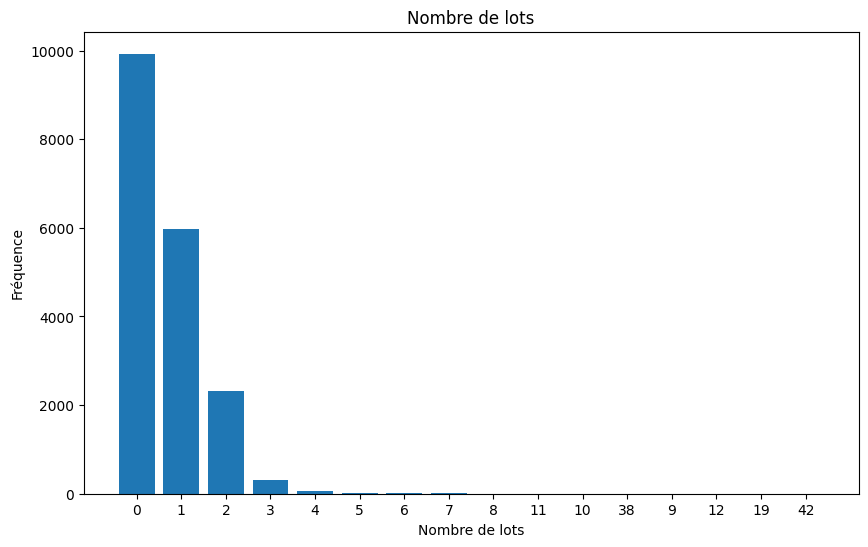

In [42]:
#Visualisation graphique
plt.figure(figsize=(10, 6))
plt.bar(nombre_lots_counts['Nombre de lots'], nombre_lots_counts['Fréquence'])
plt.xlabel('Nombre de lots')
plt.ylabel('Fréquence')
plt.title('Nombre de lots')
plt.show()

SURFACE CARREZ DU 1ER LOT, SURFACE CARREZ DU 2EME LOT, SURFACE CARREZ DU 3EME LOT, 
SURFACE CARREZ DU 4EME LOT, SURFACE CARREZ DU 5EME LOT

In [27]:
#Inspection préliminaire 1er lot
premier_lot_counts = chunk['Surface Carrez du 1er lot'].fillna('NaN').value_counts().reset_index()
premier_lot_counts.columns = ['Surface Carrez du 1er lot', 'Fréquence']
premier_lot_counts = premier_lot_counts.sort_values('Surface Carrez du 1er lot', ascending=True)
premier_lot_counts

,Surface Carrez du 1er lot,Fréquence
1288,"0,57",1
1645,"10,00",1
486,"10,02",1
1237,"10,32",1
1009,"10,37",1
...,...,...
791,"99,46",1
484,"99,54",1
466,"99,75",1
1392,"99,94",1


In [25]:
#Inspection préliminaire 2eme lot
deuxieme_lot_counts = chunk['Surface Carrez du 2eme lot'].fillna('NaN').value_counts().reset_index()
deuxieme_lot_counts.columns = ['Surface Carrez du 2eme lot', 'Fréquence']
deuxieme_lot_counts = deuxieme_lot_counts.sort_values('Surface Carrez du 2eme lot', ascending=True)
deuxieme_lot_counts

,Surface Carrez du 2eme lot,Fréquence
561,"1,80",1
34,"10,00",2
281,"10,40",1
296,"10,57",1
707,"100,00",1
...,...,...
429,"98,00",1
433,"98,10",1
609,"98,36",1
409,"99,19",1


In [24]:
#Inspection préliminaire 3eme lot
troisieme_lot_counts = chunk['Surface Carrez du 3eme lot'].fillna('NaN').value_counts().reset_index()
troisieme_lot_counts.columns = ['Surface Carrez du 3eme lot', 'Fréquence']
troisieme_lot_counts = troisieme_lot_counts.sort_values('Surface Carrez du 3eme lot', ascending=True)
troisieme_lot_counts

,Surface Carrez du 3eme lot,Fréquence
25,"10,00",1
26,"10,40",1
73,"101,35",1
32,"105,91",1
75,"110,37",1
...,...,...
41,"90,06",1
49,"94,80",1
21,"96,40",1
7,"98,83",1


In [23]:
#Inspection préliminaire 4eme lot
quatrieme_lot_counts = chunk['Surface Carrez du 4eme lot'].fillna('NaN').value_counts().reset_index()
quatrieme_lot_counts.columns = ['Surface Carrez du 4eme lot', 'Fréquence']
quatrieme_lot_counts = quatrieme_lot_counts.sort_values('Surface Carrez du 4eme lot', ascending=True)
quatrieme_lot_counts

,Surface Carrez du 4eme lot,Fréquence
3,"104,42",1
6,"12,12",1
4,"13,47",1
1,"50,00",2
2,"69,51",1
5,"76,20",1
7,"92,40",1
0,NaN,18641


In [21]:
#Inspection préliminaire 5eme lot
cinquieme_lot_counts = chunk['Surface Carrez du 5eme lot'].fillna('NaN').value_counts().reset_index()
cinquieme_lot_counts.columns = ['Surface Carrez du 5eme lot', 'Fréquence']
cinquieme_lot_counts = cinquieme_lot_counts.sort_values('Surface Carrez du 5eme lot', ascending=True)
cinquieme_lot_counts

,Surface Carrez du 5eme lot,Fréquence
2,"102,13",1
1,"107,00",1
0,NaN,18647


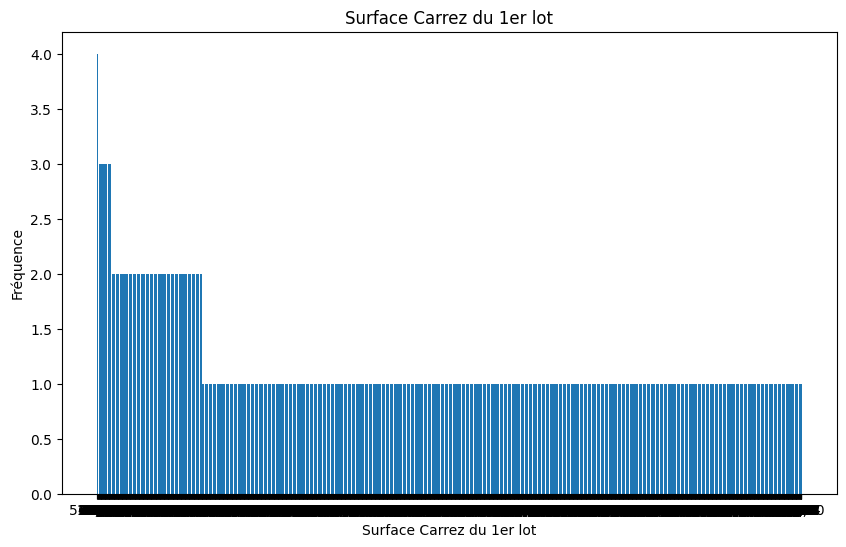

In [66]:
#Visualisation graphique
#Pas utile

CODE POSTAL

In [35]:
#Inspection préliminaire
nan_count = chunk['Code postal'].isna().sum()
nan_row = pd.DataFrame({'Code postal': ['NaN'], 'Fréquence': [nan_count]})
code_postal_counts = pd.concat([code_postal_counts, nan_row], ignore_index=True)
code_postal_counts

,Code postal,Fréquence,Département
0,75016,234,75
1,75015,222,75
2,75018,199,75
3,75017,187,75
4,31200,152,31
...,...,...,...
859,59294,1,59
860,59153,1,59
861,59241,1,59
862,59246,1,59


In [34]:
nan_count = chunk['Code postal'].isna().sum()
nan_row = pd.DataFrame({'Département': ['NaN'], 'Fréquence': [nan_count]})
departement_counts = pd.concat([departement_counts, nan_row], ignore_index=True)
departement_counts

,Département,Fréquence
0,33,2571
1,59,2530
2,13,2389
3,75,2266
4,31,2232
5,34,2212
6,44,2185
7,69,2157
8,67,107
9,NaN,0


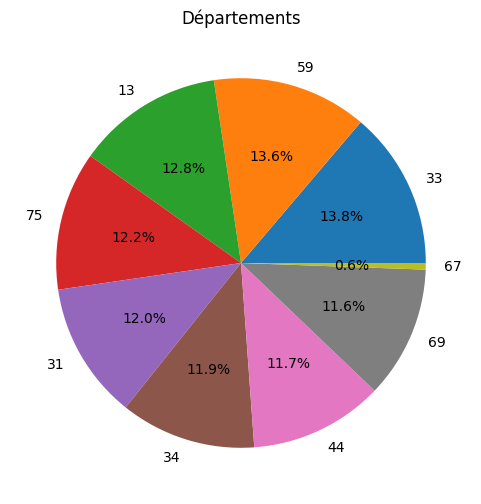

In [33]:
#Visualisation graphique
plt.figure(figsize=(6, 6))
plt.pie(departement_counts['Fréquence'], labels=departement_counts['Département'], autopct='%1.1f%%')
plt.title('Départements')
plt.show()

CODE TYPE LOCAL

In [38]:
#Inspection préliminaire
codetypelocal_counts = chunk['Code type local'].fillna('NaN').value_counts().reset_index()
codetypelocal_counts.columns = ['Code type local', 'Fréquence']
codetypelocal_counts = codetypelocal_counts.sort_values('Code type local', ascending=True)
codetypelocal_counts

,Code type local,Fréquence
3,1,2674
2,2,3709
0,3,5945
4,4,751
1,NaN,5570


In [ ]:
#Visualisation graphique
#Pas utile

SURFACE REELLE BATI

In [43]:
#Inspection préliminaire
surface_reelle_counts = chunk['Surface reelle bati'].fillna('NaN').value_counts().reset_index()
surface_reelle_counts.columns = ['Surface reelle bati', 'Fréquence']
surface_reelle_counts = surface_reelle_counts.sort_values('Surface reelle bati', ascending=True)
surface_reelle_counts

,Surface reelle bati,Fréquence
0,0,5969
344,1,1
87,10,35
6,100,111
288,10000,1
...,...,...
81,98,39
384,9843,1
75,99,44
296,990,1


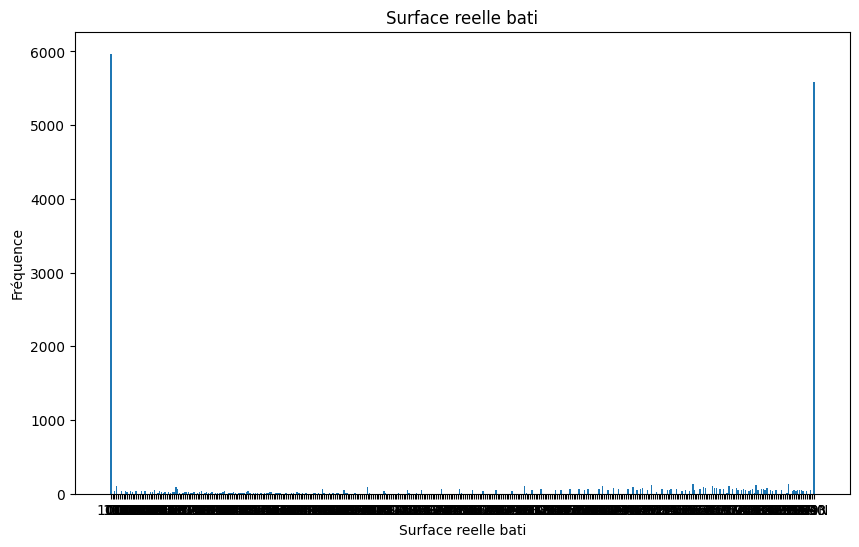

In [49]:
#Visualisation graphique
plt.figure(figsize=(10, 6))
plt.bar(surface_reelle_counts['Surface reelle bati'], surface_reelle_counts['Fréquence'])
plt.xlabel('Surface reelle bati')
plt.ylabel('Fréquence')
plt.title('Surface reelle bati')
plt.show()

NOMBRE PIECES PRINCIPALES

In [50]:
#Inspection préliminaire
nb_pieces_counts = chunk['Nombre pieces principales'].fillna('NaN').value_counts().reset_index()
nb_pieces_counts.columns = ['Nombre pieces principales', 'Fréquence']
nb_pieces_counts = nb_pieces_counts.sort_values('Nombre pieces principales', ascending=True)
nb_pieces_counts

,Nombre pieces principales,Fréquence
0,0,6703
5,1,856
11,10,8
12,11,4
14,13,2
13,14,3
4,2,1307
2,3,1564
3,4,1415
6,5,797


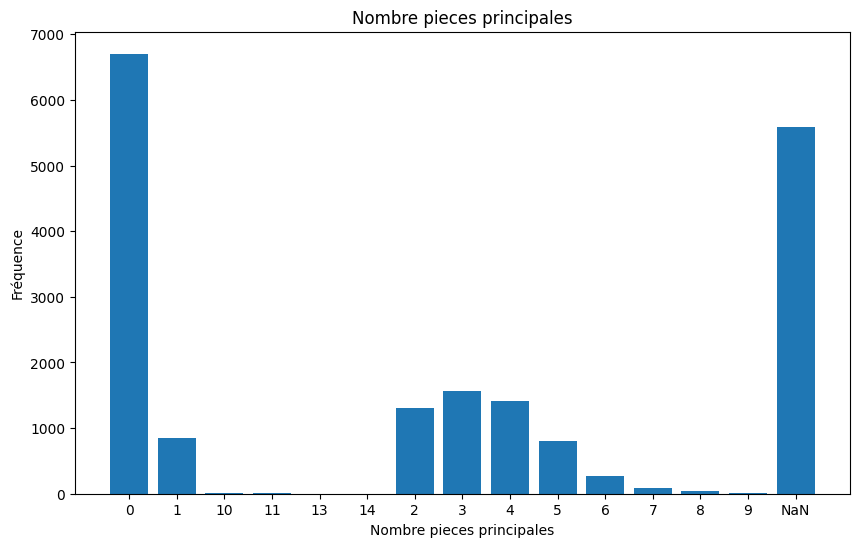

In [51]:
#Visualisation graphique
plt.figure(figsize=(10, 6))
plt.bar(nb_pieces_counts['Nombre pieces principales'], nb_pieces_counts['Fréquence'])
plt.xlabel('Nombre pieces principales')
plt.ylabel('Fréquence')
plt.title('Nombre pieces principales')
plt.show()

SRUFACE TERRAIN

In [52]:
#Inspection préliminaire
surface_terrain_counts = chunk['Surface terrain'].fillna('NaN').value_counts().reset_index()
surface_terrain_counts.columns = ['Surface terrain', 'Fréquence']
surface_terrain_counts = surface_terrain_counts.sort_values('Surface terrain', ascending=True)
surface_terrain_counts

,Surface terrain,Fréquence
342,0,7
5,1,35
59,10,16
20,100,23
2,1000,117
...,...,...
741,997,4
2645,9975,1
1207,998,2
1882,999,1


In [54]:
surface_terrain_counts = chunk['Surface terrain'].value_counts().reset_index()
surface_terrain_counts.columns = ['Surface terrain', 'Fréquence']
surface_terrain_counts = surface_terrain_counts.sort_values('Surface terrain', ascending=True)
surface_terrain_counts

,Surface terrain,Fréquence
401,0,7
4,1,35
52,10,16
19,100,23
1,1000,117
...,...,...
873,996,3
701,997,4
2644,9975,1
1364,998,2


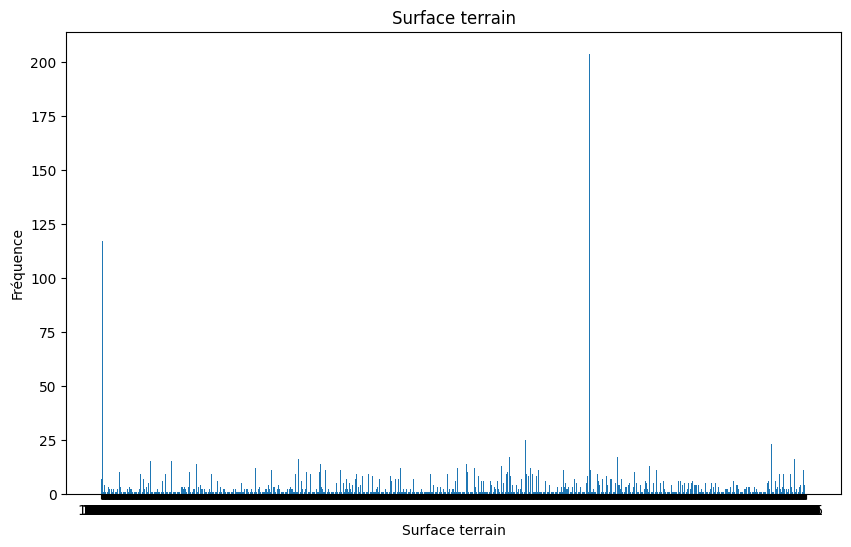

In [55]:
#Visualisation graphique
plt.figure(figsize=(10, 6))
plt.bar(surface_terrain_counts['Surface terrain'], surface_terrain_counts['Fréquence'])
plt.xlabel('Surface terrain')
plt.ylabel('Fréquence')
plt.title('Surface terrain')
plt.show()